# **THE SPARKS FOUNDATION - GRADUATE ROTATIONAL INTERNSHIP PROGRAM**

## **TASK-4: To Explore Decision Tree Algorithm**

In this task a decision tree based **classification** model is used to classify the **species** of flowers based on their **petal** and **sepal dimensions.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

#### LOADING THE DATASETS:

In [2]:
#reading the csv file
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#printing the column names from the dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
print("The number of rows and columns present in the datasets are",data.shape[0],'and',data.shape[1])

The number of rows and columns present in the datasets are 150 and 6


In [5]:
print("The number of Unique classes present in the Species column is",len(data["Species"].unique()))

The number of Unique classes present in the Species column is 3


In [6]:
print("The Unique classes present in the Species column is",data["Species"].unique()[0],',',
      data["Species"].unique()[1],"and",data["Species"].unique()[2])

The Unique classes present in the Species column is Iris-setosa , Iris-versicolor and Iris-virginica


**DATA PREPROCESSINGS:**

In [7]:
#Checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The given data does not contain any missing values.

In [8]:
print("The total number null elements present in the dataset is",(data.isnull().sum()[0])+(data.isnull().sum()[1])+
      (data.isnull().sum()[2])+(data.isnull().sum()[3])+(data.isnull().sum()[4])+(data.isnull().sum()[5]))

The total number null elements present in the dataset is 0


In [9]:
#Printing the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**INSIGHSTS FROM DATASET:**

In the given dataset **six** columns (i.e) **Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species**  are present. The datatype of Id is **int64**, SepalLengthCm is **float64**, SepalWidthCm is **float64**, PetalLengthCm is **float64**, PetalWidthCm is **float64** and Species is **object**. The total number of **rows** is **150** and **columns** is **6**. The SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm columns are the **feature variable** and Species column is the **target variable**. For a given set of values of SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm, the **target Species class** is predicted. Here SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm are the input given and Species is the output which is to be predicted using the **classification models**. Here the **Id** column is not an relevant feature variable for predictions as it used for the identification purpose and it does not have any relation with target variable.

**STATISTICAL STUDY ABOUT DATASET:**

In [10]:
print("The descriptive statistics of the dataset is given in the form of table:")
data.describe()

The descriptive statistics of the dataset is given in the form of table:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Printing the median values of each columns
data.median()

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [12]:
#Printing the mode values of each columns
data.mode().head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.0,3.0,1.5,0.2,Iris-setosa


In [13]:
#evaluating the correlation between feature and target variables.
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1, 'Correlation Heatmap')

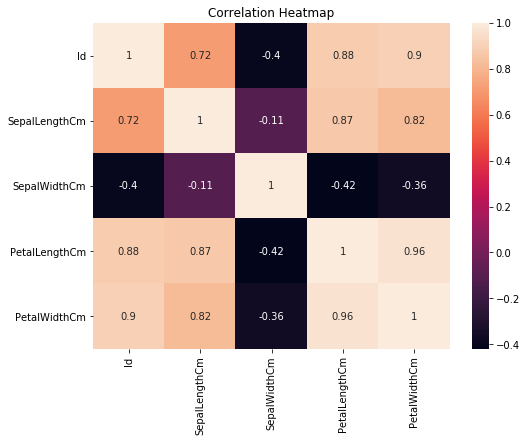

In [14]:
#plotting correlation heat map using visualization libraries
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(data.corr(),annot=True)
heatmap.set_title('Correlation Heatmap')

**DATA VISUALIZATIONS:**

**UNI-VARIATE ANALYSIS:**

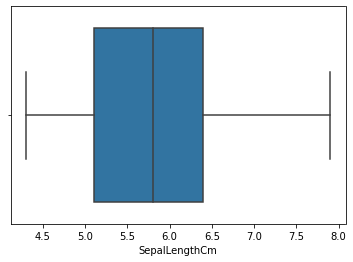

In [15]:
#Plotting box plot for SepalLengthCm column
sns.boxplot(x='SepalLengthCm',data=data)

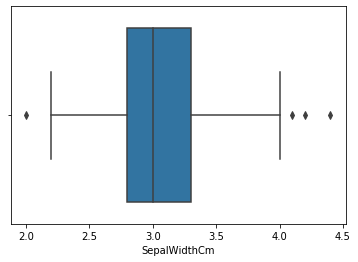

In [16]:
#Plotting box plot for SepalWidthCm column
sns.boxplot(x='SepalWidthCm',data=data)

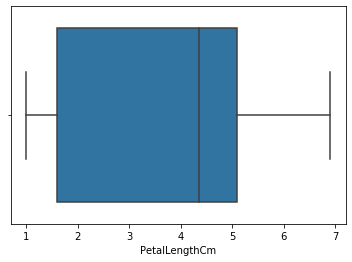

In [17]:
#Plotting box plot for PetalLengthCm column
sns.boxplot(x='PetalLengthCm',data=data)

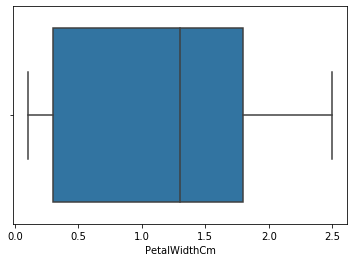

In [18]:
#Plotting box plot for PetalWidthCm column
sns.boxplot(x='PetalWidthCm',data=data)

  **BI-VARIATE ANALYSIS:**

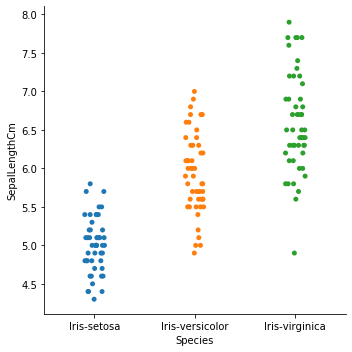

In [19]:
#Plotting scattar plot for SepalLengthCm and Species column
sns.catplot(x="Species", y="SepalLengthCm", data=data)

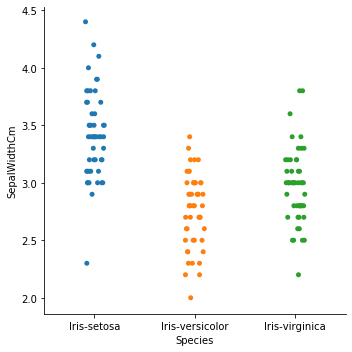

In [20]:
#Plotting scattar plot for SepalWidthCm and Species column
sns.catplot(x="Species", y="SepalWidthCm", data=data)

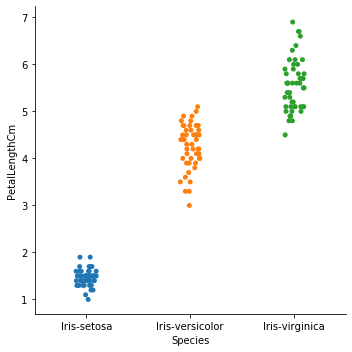

In [21]:
#Plotting scattar plot for PetalLengthCm and Species column
sns.catplot(x="Species", y="PetalLengthCm", data=data)

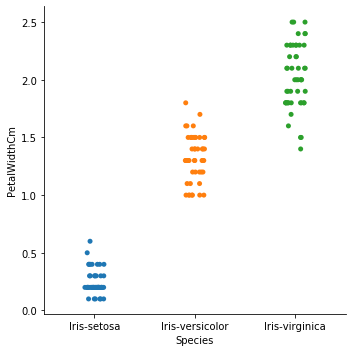

In [22]:
#Plotting scattar plot for PetalWidthCm and Species column
sns.catplot(x="Species", y="PetalWidthCm", data=data)

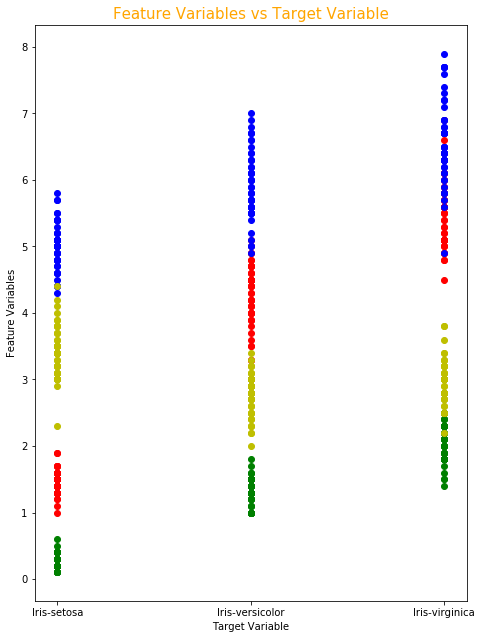

In [25]:
#Plotting combined scatter plot of feature varibles and target variables; 
fig=plt.figure()
ax=fig.add_axes([0,1,1,2])
ax.scatter(x="Species", y="PetalLengthCm", data=data, color='r')
ax.scatter(x="Species", y="PetalWidthCm", data=data, color='g')
ax.scatter(x="Species", y="SepalLengthCm", data=data, color='b')
ax.scatter(x="Species", y="SepalWidthCm", data=data, color='y')
ax.set_xlabel('Target Variable')
ax.set_ylabel('Feature Variables')
ax.set_title('Feature Variables vs Target Variable',color='orange',fontsize=15)
plt.show()

#### FEATURE SELECTION:

In [29]:
#selecting the feature variable
x=data.drop(["Id","Species"],axis=1)

In [30]:
#selecting the target variable
y=data["Species"]

#### TRAIN-TEST SPLITTING:

In [31]:
#importing train-test split package
from sklearn.model_selection import train_test_split

In [32]:
#creating train-test split with 80% train and 20% test datas
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


#### MODEL BUILDING:

#### DECISION TREE CLASSIFICATION MODEL:

In [34]:
#importing decision tree classification model from scikit learn packages
from sklearn.tree import DecisionTreeClassifier

In [35]:
#importing metrics
from sklearn import metrics

In [36]:
#instantsiating the decision tree classification model
dec = DecisionTreeClassifier(criterion='gini')

In [37]:
#fitting the decision tree classification model with train datasets
dec.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
#predicting the test datas with decision tree classification model
y_pred = dec.predict(x_test)

**MODEL EVALUATIONS:**

In [39]:
print("The training set accuracy of model is",dec.score(x_train,y_train))

The training set accuracy of model is 1.0


In [40]:
print("The testing set accuracy of model is",dec.score(x_test,y_test))

The testing set accuracy of model is 1.0


In [41]:
#importing model's performance evaluating metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [42]:
#Printing the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
#Printing the classification report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



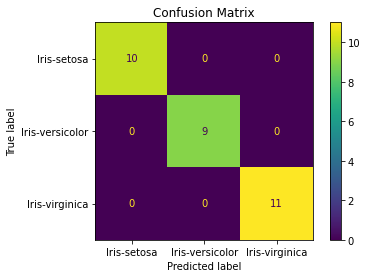

In [44]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(dec,x_test,y_test)
plt.title("Confusion Matrix")
plt.show()

**PREDICTION COMPARISONS:**

In [45]:
# Comparing Actual Values vs Predicted Values
df = pd.DataFrame({'Actual Classes': y_test, 'Predicted Classes': y_pred})  
df

,Actual Classes,Predicted Classes
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


 **VISUALIZING THE DECISION TREE CLASSIFICATION MODEL:**

In [46]:
#installing required packages
!pip install graphviz
!pip install pydotplus

In [47]:
#Printing the unique elements of target variable
species_array = data.Species.unique()
print(species_array)
print(type(species_array))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
<class 'numpy.ndarray'>


In [48]:
#Converting numpy array into list
species_list = species_array.tolist()
print(species_list)
print(type(species_list))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
<class 'list'>


In [49]:
#importing necessary library and module packages
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


**export_graphviz** function converts decision tree classifier into dot file and **pydotplus** convert the dot file to png or displayable form.

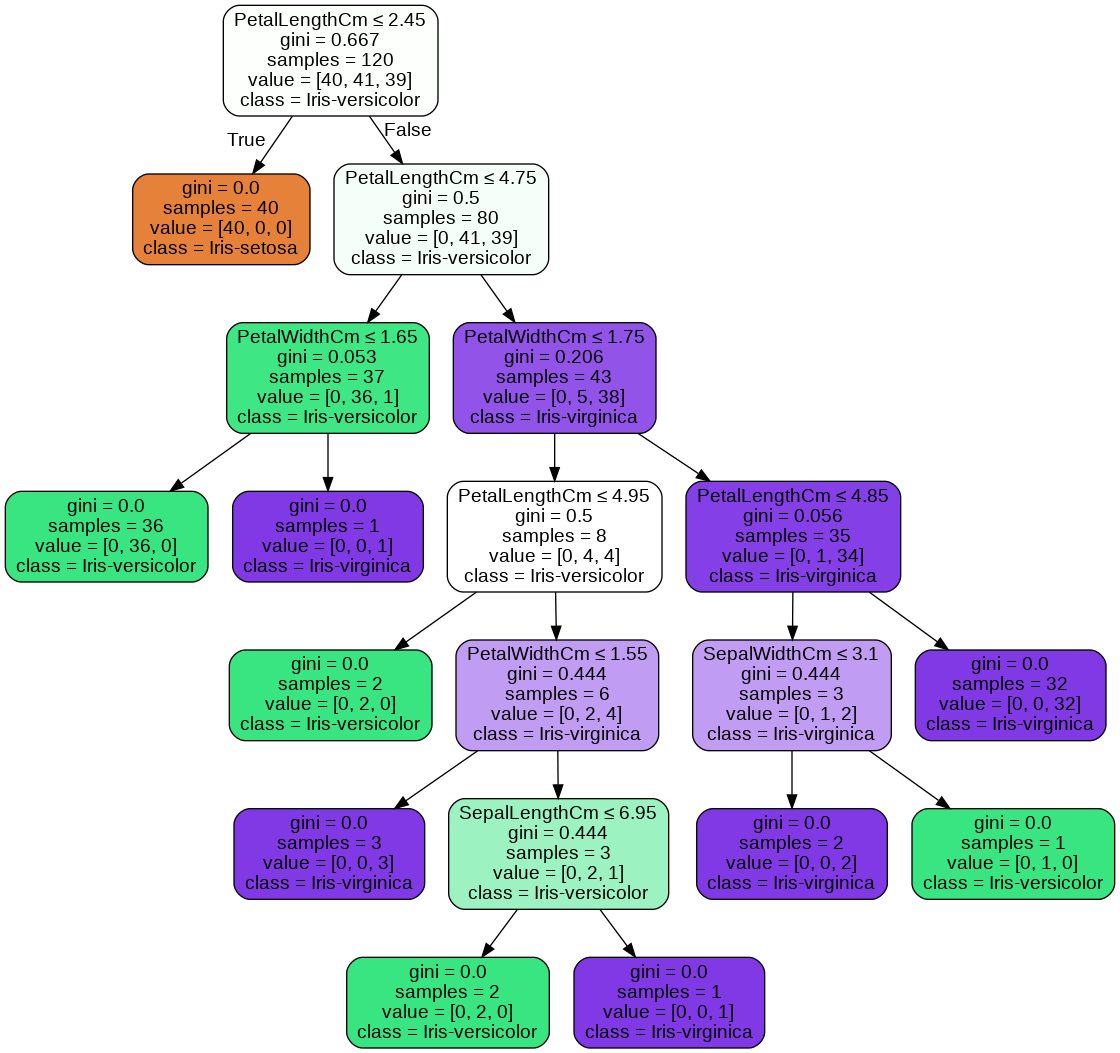

In [50]:
dot_data = StringIO()
export_graphviz(dec, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns ,class_names= species_list)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())